In [1]:
#keras and tensorflow >2.0


In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as pdr
#No module named 'pandas_datareader
#for that we need to install pip pandas_datareader

C:\Users\MOHD ZEESHAN\anaconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MOHD ZEESHAN\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\MOHD ZEESHAN\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
df=pdr.get_data_tiingo('GOOG',api_key='4f4330353168c0112fe80059c3a562f2a106c30d')

C:\Users\MOHD ZEESHAN\anaconda3\Lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.to_csv('GOOG.csv')

In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('GOOG.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2018-09-05 00:00:00+00:00,1186.48,1199.01,1162.000,1193.80,2061309,59.3240,59.9505,58.10000,59.6900,41226180,0.0,1.0
1,GOOG,2018-09-06 00:00:00+00:00,1171.44,1186.30,1152.000,1186.30,1888467,58.5720,59.3150,57.60000,59.3150,37769340,0.0,1.0
2,GOOG,2018-09-07 00:00:00+00:00,1164.83,1175.26,1157.215,1158.67,1401404,58.2415,58.7630,57.86075,57.9335,28028080,0.0,1.0
3,GOOG,2018-09-10 00:00:00+00:00,1164.64,1174.54,1160.110,1172.19,1115796,58.2320,58.7270,58.00550,58.6095,22315920,0.0,1.0
4,GOOG,2018-09-11 00:00:00+00:00,1177.36,1178.68,1156.240,1161.63,1209565,58.8680,58.9340,57.81200,58.0815,24191300,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOG,2023-08-28 00:00:00+00:00,131.79,133.240,130.850,132.0800,16715467,131.79,133.240,130.850,132.0800,16715467,0.0,1.0
1253,GOOG,2023-08-29 00:00:00+00:00,135.49,137.295,132.980,132.9981,30803265,135.49,137.295,132.980,132.9981,30803265,0.0,1.0
1254,GOOG,2023-08-30 00:00:00+00:00,136.93,137.250,135.021,135.5700,21773356,136.93,137.250,135.021,135.5700,21773356,0.0,1.0
1255,GOOG,2023-08-31 00:00:00+00:00,137.35,138.400,136.820,137.0500,28147850,137.35,138.400,136.820,137.0500,28147850,0.0,1.0
1256,GOOG,2023-09-01 00:00:00+00:00,136.80,138.580,135.940,138.4300,16671647,136.80,138.580,135.940,138.4300,16671647,0.0,1.0


In [10]:

df2=df.reset_index()['close']

In [11]:
df2.head()

0    1186.48
1    1171.44
2    1164.83
3    1164.64
4    1177.36
Name: close, dtype: float64

In [12]:
df2[1252:]

1252    131.79
1253    135.49
1254    136.93
1255    137.35
1256    136.80
Name: close, dtype: float64

In [13]:
df1=df.reset_index()['high']

In [14]:
df1[1252:]

1252    133.240
1253    137.295
1254    137.250
1255    138.400
1256    138.580
Name: high, dtype: float64

In [15]:
df1.shape

(1257,)

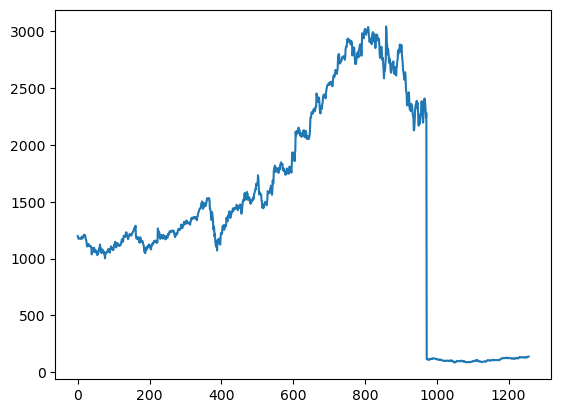

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

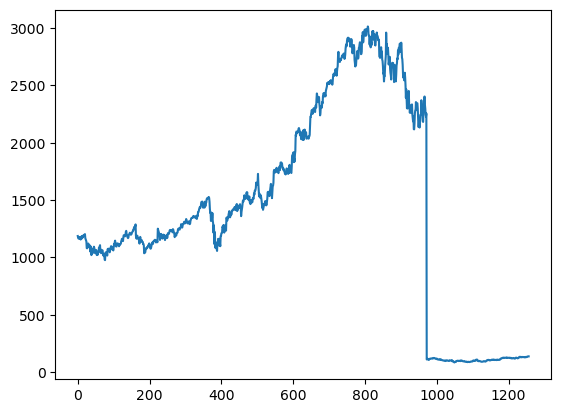

In [17]:
plt.plot(df2)

In [18]:
#lstm are sensitive to the scale of the data . so we apply MinMax scalar


In [19]:
#import numpy as np

In [20]:
df1

0       1199.010
1       1186.300
2       1175.260
3       1174.540
4       1178.680
          ...   
1252     133.240
1253     137.295
1254     137.250
1255     138.400
1256     138.580
Name: high, Length: 1257, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
df1

array([[0.37640968],
       [0.37210915],
       [0.36837368],
       ...,
       [0.01715475],
       [0.01754386],
       [0.01760476]])

In [23]:
#pehle df1 ki values float simple thi dekh sakte hai but after preprocessing wo values change ho gyi hai a [ARRAYS ]me

In [24]:
df1.shape

(1257, 1)

In [25]:
#splitting dataset into train and test

In [26]:
#methods of train test are the following
#1- cross validation
#2- random seed

# these works very well in linear regression models

##but in case of time series data means day2 depends on day 1 similarly day 5 depends on day4 
#so 70 percent ko man lenge training and remaining ko test

In [27]:
#splitting dataset into train and test
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(817, 440)

In [29]:
training_size

817

In [30]:
import numpy
#convert an array of values into dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0] ##i=0 , 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX),numpy.array(dataY)

In [31]:
#reshape into X=1,t+1,t+2,t+3 and y=t+4
time_step=100
X_train, y_train =create_dataset(train_data, time_step)
X_test, ytest= create_dataset(test_data, time_step)

In [32]:
print(X_train)

[[0.37640968 0.37210915 0.36837368 ... 0.34087872 0.33715678 0.33450067]
 [0.37210915 0.36837368 0.36813006 ... 0.33715678 0.33450067 0.33986364]
 [0.36837368 0.36813006 0.36953087 ... 0.33450067 0.33986364 0.34877261]
 ...
 [0.85477619 0.85066572 0.84942733 ... 0.99082712 0.9701839  0.96548749]
 [0.85066572 0.84942733 0.8556565  ... 0.9701839  0.96548749 0.95396315]
 [0.84942733 0.8556565  0.86426429 ... 0.96548749 0.95396315 0.96455362]]


In [33]:
print(X_test.shape),print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [34]:
#reshape input to be[samples, time steps, features] which is required for lstm
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [35]:
##conda install tensorflow

In [36]:
pip install tensorflow

In [37]:
!pip install keras  

In [40]:
##create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [42]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.fit(X_train, y_train, validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 186ms/step - loss: 0.0659 - val_loss: 0.0212
Epoch 2/100
12/12 [==============================] - 1s 100ms/step - loss: 0.0132 - val_loss: 0.0337
Epoch 3/100
12/12 [==============================] - 1s 100ms/step - loss: 0.0046 - val_loss: 0.0209
Epoch 4/100
12/12 [==============================] - 1s 99ms/step - loss: 0.0019 - val_loss: 0.0160
Epoch 5/100
12/12 [==============================] - 1s 101ms/step - loss: 7.5703e-04 - val_loss: 0.0155
Epoch 6/100
12/12 [==============================] - 1s 100ms/step - loss: 6.2851e-04 - val_loss: 0.0155
Epoch 7/100
12/12 [==============================] - 1s 98ms/step - loss: 6.1375e-04 - val_loss: 0.0156
Epoch 8/100
12/12 [==============================] - 1s 99ms/step - loss: 5.9249e-04 - val_loss: 0.0154
Epoch 9/100
12/12 [==============================] - 1s 99ms/step - loss: 6.0226e-04 - val_loss: 0.0156
Epoch 10/100
12/12 [==============================] - 1s 98ms/step - loss: 

Epoch 79/100
12/12 [==============================] - 1s 101ms/step - loss: 3.0269e-04 - val_loss: 0.0082
Epoch 80/100
12/12 [==============================] - 1s 99ms/step - loss: 3.2675e-04 - val_loss: 0.0088
Epoch 81/100
12/12 [==============================] - 1s 99ms/step - loss: 2.9817e-04 - val_loss: 0.0089
Epoch 82/100
12/12 [==============================] - 1s 99ms/step - loss: 3.0673e-04 - val_loss: 0.0090
Epoch 83/100
12/12 [==============================] - 1s 100ms/step - loss: 3.7482e-04 - val_loss: 0.0080
Epoch 84/100
12/12 [==============================] - 1s 100ms/step - loss: 4.2960e-04 - val_loss: 0.0082
Epoch 85/100
12/12 [==============================] - 1s 100ms/step - loss: 3.0402e-04 - val_loss: 0.0086
Epoch 86/100
12/12 [==============================] - 1s 100ms/step - loss: 2.7269e-04 - val_loss: 0.0086
Epoch 87/100
12/12 [==============================] - 1s 100ms/step - loss: 2.7013e-04 - val_loss: 0.0081
Epoch 88/100
12/12 [=============================

In [45]:
import tensorflow as tf

In [46]:
tf.__version__

'2.13.0'

In [47]:
###Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 19ms/step


In [49]:
##Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [50]:
##calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

1849.7732416605013

In [51]:
##test data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

1036.040575503735

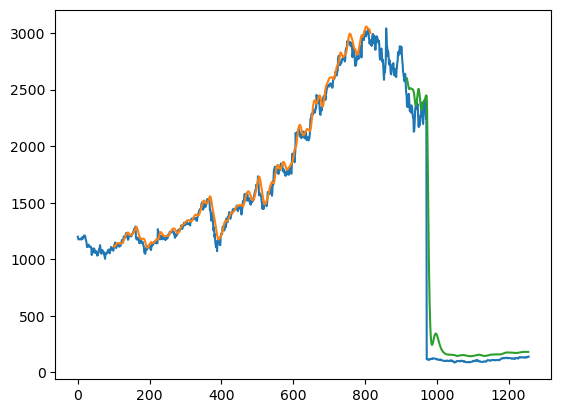

In [53]:
##plotting
#shift train prediction for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :]= train_predict

#shift test prediction for plotting

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] =numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]= test_predict

#plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [54]:
len(test_data)

440

In [55]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [56]:
x_input.shape

(1, 100)

In [57]:
temp_input= list(x_input)
temp_input=temp_input[0].tolist()

In [59]:
#demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #predict(temp input)
        x_input=np.array(temp_input[1:])
        print("{}day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print (x input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

0day input [0.00734744 0.00779238 0.0068213  0.00693634 0.00648801 0.00688135
 0.00679761 0.00702769 0.0070683  0.00692619 0.00764689 0.0073559
 0.00748786 0.00716642 0.00730176 0.00668257 0.00672994 0.00739989
 0.00813582 0.00912213 0.01079023 0.01072933 0.01091035 0.0117241
 0.01208953 0.01263767 0.01351029 0.0137035  0.01315197 0.01224852
 0.01334145 0.01334822 0.0134768  0.01297603 0.0130234  0.0136003
 0.01402155 0.01432269 0.01454939 0.01258015 0.01276794 0.01292527
 0.01330085 0.01293881 0.01340236 0.01358507 0.01306908 0.01247187
 0.01264951 0.01248202 0.01223841 0.01128255 0.01174779 0.01162598
 0.01200494 0.0116632  0.01245834 0.01170715 0.0119102  0.0110034
 0.01071749 0.0116429  0.01312321 0.01371703 0.01378132 0.01300648
 0.01316889 0.01290836 0.01175794 0.01245157 0.01256661 0.0151652
 0.01591974 0.01607877 0.01599756 0.01568966 0.01484376 0.01462383
 0.01535468 0.01539867 0.01535807 0.0155374  0.01559729 0.01485053
 0.01534792 0.01537499 0.01500533 0.0155446  0.01464413 

8 day output [[0.04755066]]
9day input [0.00692619 0.00764689 0.0073559  0.00748786 0.00716642 0.00730176
 0.00668257 0.00672994 0.00739989 0.00813582 0.00912213 0.01079023
 0.01072933 0.01091035 0.0117241  0.01208953 0.01263767 0.01351029
 0.0137035  0.01315197 0.01224852 0.01334145 0.01334822 0.0134768
 0.01297603 0.0130234  0.0136003  0.01402155 0.01432269 0.01454939
 0.01258015 0.01276794 0.01292527 0.01330085 0.01293881 0.01340236
 0.01358507 0.01306908 0.01247187 0.01264951 0.01248202 0.01223841
 0.01128255 0.01174779 0.01162598 0.01200494 0.0116632  0.01245834
 0.01170715 0.0119102  0.0110034  0.01071749 0.0116429  0.01312321
 0.01371703 0.01378132 0.01300648 0.01316889 0.01290836 0.01175794
 0.01245157 0.01256661 0.0151652  0.01591974 0.01607877 0.01599756
 0.01568966 0.01484376 0.01462383 0.01535468 0.01539867 0.01535807
 0.0155374  0.01559729 0.01485053 0.01534792 0.01537499 0.01500533
 0.0155446  0.01464413 0.01445127 0.01502309 0.01607877 0.01638329
 0.01517535 0.01579793 0

16 day output [[0.06448271]]
17day input [0.00739989 0.00813582 0.00912213 0.01079023 0.01072933 0.01091035
 0.0117241  0.01208953 0.01263767 0.01351029 0.0137035  0.01315197
 0.01224852 0.01334145 0.01334822 0.0134768  0.01297603 0.0130234
 0.0136003  0.01402155 0.01432269 0.01454939 0.01258015 0.01276794
 0.01292527 0.01330085 0.01293881 0.01340236 0.01358507 0.01306908
 0.01247187 0.01264951 0.01248202 0.01223841 0.01128255 0.01174779
 0.01162598 0.01200494 0.0116632  0.01245834 0.01170715 0.0119102
 0.0110034  0.01071749 0.0116429  0.01312321 0.01371703 0.01378132
 0.01300648 0.01316889 0.01290836 0.01175794 0.01245157 0.01256661
 0.0151652  0.01591974 0.01607877 0.01599756 0.01568966 0.01484376
 0.01462383 0.01535468 0.01539867 0.01535807 0.0155374  0.01559729
 0.01485053 0.01534792 0.01537499 0.01500533 0.0155446  0.01464413
 0.01445127 0.01502309 0.01607877 0.01638329 0.01517535 0.01579793
 0.01716997 0.01715475 0.01754386 0.01760476 0.03203132 0.03257689
 0.03354646 0.03492495 

25 day output [[0.08008262]]
26day input [0.01351029 0.0137035  0.01315197 0.01224852 0.01334145 0.01334822
 0.0134768  0.01297603 0.0130234  0.0136003  0.01402155 0.01432269
 0.01454939 0.01258015 0.01276794 0.01292527 0.01330085 0.01293881
 0.01340236 0.01358507 0.01306908 0.01247187 0.01264951 0.01248202
 0.01223841 0.01128255 0.01174779 0.01162598 0.01200494 0.0116632
 0.01245834 0.01170715 0.0119102  0.0110034  0.01071749 0.0116429
 0.01312321 0.01371703 0.01378132 0.01300648 0.01316889 0.01290836
 0.01175794 0.01245157 0.01256661 0.0151652  0.01591974 0.01607877
 0.01599756 0.01568966 0.01484376 0.01462383 0.01535468 0.01539867
 0.01535807 0.0155374  0.01559729 0.01485053 0.01534792 0.01537499
 0.01500533 0.0155446  0.01464413 0.01445127 0.01502309 0.01607877
 0.01638329 0.01517535 0.01579793 0.01716997 0.01715475 0.01754386
 0.01760476 0.03203132 0.03257689 0.03354646 0.03492495 0.03664256
 0.03861188 0.04074921 0.04298449 0.04526424 0.04755066 0.04981869
 0.05205294 0.05424472 

In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(df1)

1257

In [64]:
df3=df1.tolist()
df3.extend(lst_output)

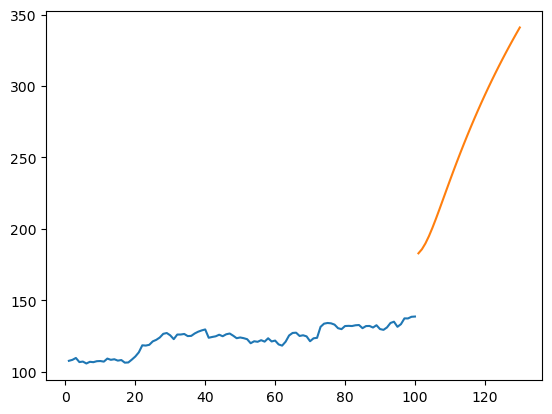

In [66]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

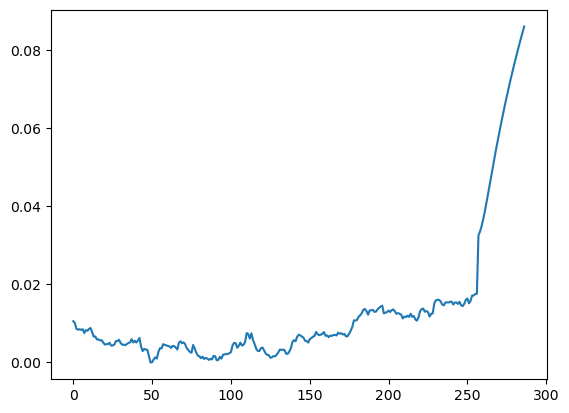

In [68]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [69]:
df3=scaler.inverse_transform(df3).tolist()

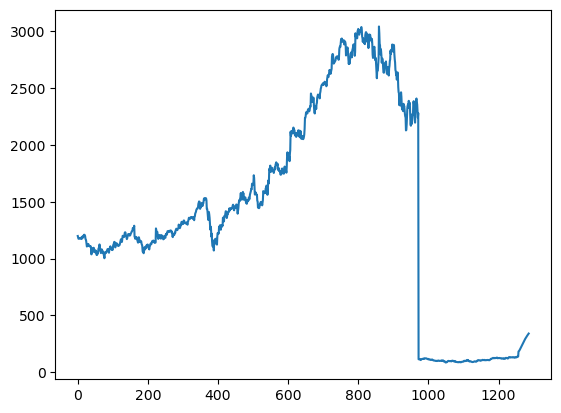

In [70]:
plt.plot(df3)

In [ ]:
S